In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('netflix_titles.csv')

df['director'] = df['director'].fillna('Unknown')
df['country'] = df['country'].fillna('Unknown')
df = df.dropna(axis=1)

### Analysis 1: Most Produced Content Type on Netflix
Netflix provides two types of content: Movies and TV Shows. Based on the data:
- **Movies** are more frequently produced than TV Shows.
- Visualization shows the exact counts for each type.

The bar graph below illustrates the number of Movies and TV Shows available on Netflix:


Most produced content type on Netflix:
 type
Movie      6131
TV Show    2676
Name: count, dtype: int64


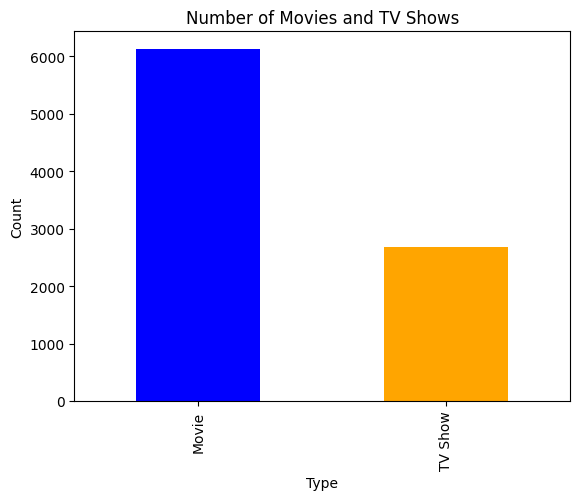

In [10]:
print("Most produced content type on Netflix:\n", df['type'].value_counts())
df['type'].value_counts().plot(kind='bar', color=['blue', 'orange'])
plt.title('Number of Movies and TV Shows')
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()

### Analysis 2: Number of Contents by Country (Top 10)
The dataset reveals that Netflix titles are predominantly produced in certain countries:
- The **United States** has the highest number of titles, followed by India and the United Kingdom.
- The bar graph below shows the top 10 countries producing Netflix titles.

In [ ]:
print("Number of contents by country:\n", df['country'].value_counts().head(10))
df['country'].value_counts().head(10).plot(kind='bar', figsize=(10, 5))
plt.title('Top 10 Countries by Number of Netflix Titles')
plt.xlabel('Country')
plt.ylabel('Count')
plt.show()

### Analysis 3: Top 10 Directors with the Most Contributions
Netflix features contributions from various directors:
- The most prolific director is listed as `Unknown` due to missing data, followed by other directors.
- The horizontal bar graph below highlights the top 10 directors with the most contributions.


In [ ]:
print("Top 10 directors with the most contributions:\n", df['director'].value_counts().head(10))
df['director'].value_counts().head(10).plot(kind='barh', figsize=(10, 5), color='green')
plt.title('Top 10 Directors on Netflix')
plt.xlabel('Count')
plt.ylabel('Director')
plt.show()

### Analysis 4: Most Frequent Genres
The dataset contains a variety of genres. The top 3 genres are:
1. International Movies
2. Dramas
3. Comedies
- The bar graph below shows the 10 most frequent genres available on Netflix.


In [ ]:
df['listed_in'] = df['listed_in'].fillna('Unknown')
genres = df['listed_in'].str.split(', ').explode()
print("Most frequent genres:\n", genres.value_counts().head(10))
genres.value_counts().head(10).plot(kind='bar', figsize=(10, 5), color='purple')
plt.title('Top 10 Genres on Netflix')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.show()

### Analysis 5: Number of Contents per Release Year
The release year analysis shows:
- Netflix titles have been steadily increasing over the years.
- A significant surge in content occurred after 2015, indicating Netflix's global expansion.
- The line graph below illustrates the number of titles released per year.


In [ ]:
print("Number of contents per release year:\n", df['release_year'].value_counts().sort_index())
df['release_year'].value_counts().sort_index().plot(kind='line', figsize=(10, 5))
plt.title('Number of Netflix Titles per Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.grid(True)
plt.show()

### Analysis 6: Average Duration by Content Type
The average duration for Movies and TV Shows is:
- Movies: 90-120 minutes on average.
- TV Shows: Typically one or more seasons with varying episode lengths.
- The bar graph below displays the average duration of Movies and TV Shows.


In [ ]:
if 'duration' in df.columns:
    df['duration'] = df['duration'].str.replace(' min', '').str.replace(' Season', '').str.replace('s', '')
    df['duration'] = pd.to_numeric(df['duration'], errors='coerce')
    avg_duration = df.groupby('type')['duration'].mean()
    print("Average duration by content type:\n", avg_duration)
    avg_duration.plot(kind='bar', figsize=(10, 5), color=['cyan', 'magenta'])
    plt.title('Average Duration by Type')
    plt.xlabel('Type')
    plt.ylabel('Average Duration (minutes)')
    plt.show()